<a href="https://colab.research.google.com/github/alyarh-11/SitemPakar_CF_-_FuzzyLogic/blob/main/Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 33.2 MB/s eta 0:00:00


Untuk suhu 30°C dan kelembaban 75%, kecepatan kipas AC: 90.28%


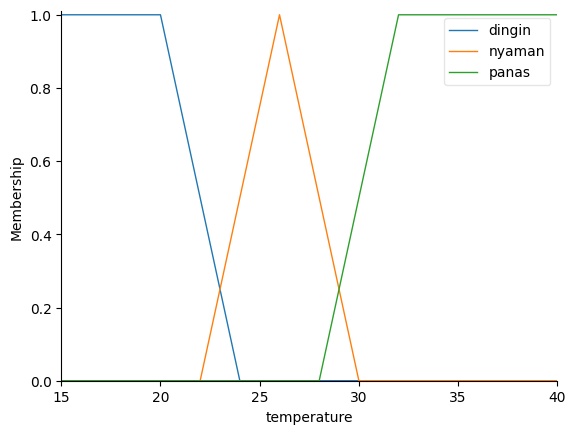

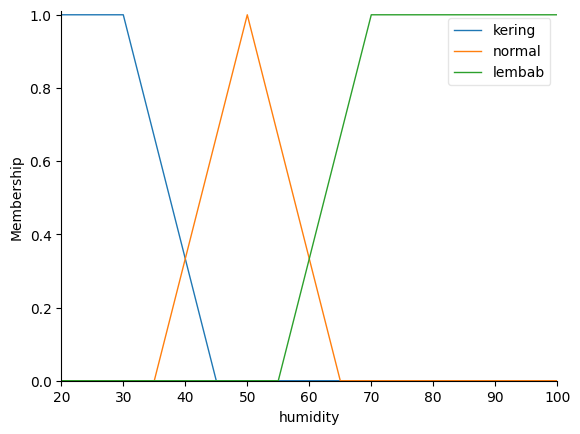

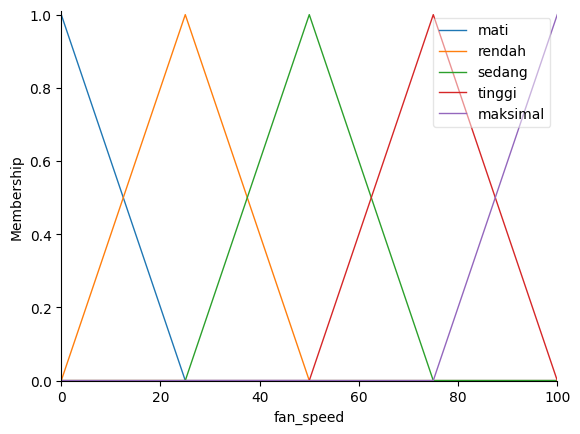

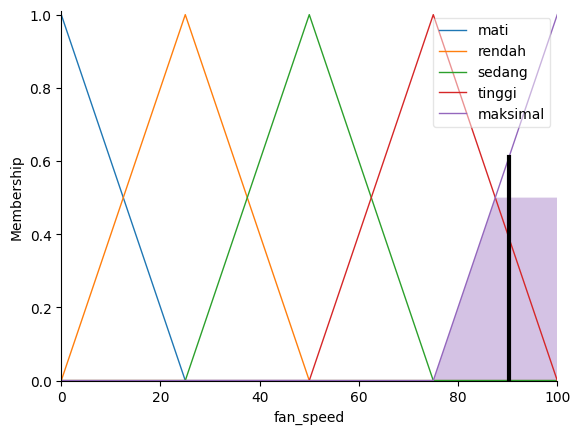


Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: 25.00%


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])

# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['dingin'] & humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati'])
rule3 = ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['rendah'])

rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] & humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['tinggi'])

rule7 = ctrl.Rule(temperature['panas'] & humidity['kering'], fan_speed['tinggi'])
rule8 = ctrl.Rule(temperature['panas'] & humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] & humidity['lembab'], fan_speed['maksimal'])

# Menambahkan rule baru
rule10 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])

# Create control system
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Input values
ac.input['temperature'] = 30
ac.input['humidity'] = 75

# Compute result
ac.compute()
print(f"Untuk suhu 30°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

# Visualize result
fan_speed.view(sim=ac)
plt.show()

# Mengubah input suhu menjadi 22°C
ac.input['temperature'] = 22
ac.input['humidity'] = 75
ac.compute()
print(f"\nUntuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")



Suhu 28°C memiliki klasifikasi nilai dalam dua kategori berbeda, yaitu "nyaman" dan "panas," karena sistem logika fuzzy dirancang untuk mengidentifikasi kondisi yang tidak terlalu panas atau terlalu dingin. Dalam logika fuzzy, satu nilai masukan dapat diklasifikasikan ke dalam lebih dari satu kategori berdasarkan klasifikasi derajat saat ini. Dalam hal ini, "nyaman" didefinisikan sebagai memiliki fungsi segitiga yang menaikkan suhu dari 22°C ke 30°C, sedangkan "panas" didefinisikan sebagai memiliki rentang suhu 28°C hingga 40°C menggunakan fungsi trapesium. Karena suhu 28°C berada di area tumpang tindih, suhu ini akan memiliki beberapa klasifikasi dalam kategori "nyaman" dan beberapa lagi dalam kategori "panas".Hal ini menyoroti fakta bahwa meskipun suhu 28°C cukup nyaman, suhu tersebut juga dapat menyebabkan gejala pandemi. Dengan menggunakan mekanisme ini, sistem fuzzy dapat menghasilkan hasil yang lebih fleksibel dan realistis daripada sistem logika biner kaku.

Ketika suhu turun dari 30°C ke 22°C dengan kelembaban 75%, AC berjalan lancar. Hal ini terjadi karena suhu 30°C termasuk kategori "nyaman" dan "panas", sedangkan suhu 22°C hanya termasuk kategori "dingin". Dengan kelembaban "lembab", aturan fuzzy aktif berubah dari yang sebelumnya memengaruhi kecepatan tinggi atau maksimal menjadi yang memengaruhi kecepatan rendah. Hal ini menunjukkan bahwa sistem fuzzy menyesuaikan output berdasarkan perubahan kecil pada input melalui kombinasi faktor alam dan manusia.